In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv('/Users/zabihbuda/Desktop/York Universiy files/Data Science /schulich_data_science_1/final exam dataset/churn_data.csv')
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,Month_4_Spend,Month_4_Items,Month_4_Support_Calls,Month_5_Spend,Month_5_Items,Month_5_Support_Calls,Month_6_Spend,Month_6_Items,Month_6_Support_Calls,Month_7_Spend,Month_7_Items,Month_7_Support_Calls,Month_8_Spend,Month_8_Items,Month_8_Support_Calls,Month_9_Spend,Month_9_Items,Month_9_Support_Calls,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,212.323540,96,4,161.351349,93,3,845.591428,77,3,664.209269,61,0,819.002361,29,0,602.361687,56,1,821.634080,30,5,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,186.909752,63,4,773.303829,34,0,297.160079,39,0,528.034104,99,1,456.572210,51,5,140.452893,80,5,119.900545,40,1,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,316.492407,40,5,356.415894,99,1,675.126273,81,0,526.519139,90,4,289.880026,68,2,742.794005,43,4,339.855588,46,2,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,162.945529,65,2,309.053455,99,0,823.619025,80,5,348.223830,65,0,512.166973,39,0,506.548323,72,5,569.576871,94,0,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,736.904463,69,1,318.644264,65,1,365.203121,44,0,742.525914,70,3,268.635619,34,3,227.938452,75,0,199.742734,67,0,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [6]:
#checking the missing values
df.isnull().sum()/100

CustomerID                0.0
Age                       0.0
Location                  0.0
Device                    0.0
Month_1_Spend             0.0
Month_1_Items             0.0
Month_1_Support_Calls     0.0
Month_2_Spend             0.0
Month_2_Items             0.0
Month_2_Support_Calls     0.0
Month_3_Spend             0.0
Month_3_Items             0.0
Month_3_Support_Calls     0.0
Month_4_Spend             0.0
Month_4_Items             0.0
Month_4_Support_Calls     0.0
Month_5_Spend             0.0
Month_5_Items             0.0
Month_5_Support_Calls     0.0
Month_6_Spend             0.0
Month_6_Items             0.0
Month_6_Support_Calls     0.0
Month_7_Spend             0.0
Month_7_Items             0.0
Month_7_Support_Calls     0.0
Month_8_Spend             0.0
Month_8_Items             0.0
Month_8_Support_Calls     0.0
Month_9_Spend             0.0
Month_9_Items             0.0
Month_9_Support_Calls     0.0
Month_10_Spend            0.0
Month_10_Items            0.0
Month_10_S

I don't see any missing missing but it doesn't the dataset has not missing because some values may filled with 0. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Location                10000 non-null  object 
 3   Device                  10000 non-null  object 
 4   Month_1_Spend           10000 non-null  float64
 5   Month_1_Items           10000 non-null  int64  
 6   Month_1_Support_Calls   10000 non-null  int64  
 7   Month_2_Spend           10000 non-null  float64
 8   Month_2_Items           10000 non-null  int64  
 9   Month_2_Support_Calls   10000 non-null  int64  
 10  Month_3_Spend           10000 non-null  float64
 11  Month_3_Items           10000 non-null  int64  
 12  Month_3_Support_Calls   10000 non-null  int64  
 13  Month_4_Spend           10000 non-null  float64
 14  Month_4_Items           10000 non-null 

# Data Exploration

In [8]:
df.describe(include='all')

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,Month_4_Spend,Month_4_Items,Month_4_Support_Calls,Month_5_Spend,Month_5_Items,Month_5_Support_Calls,Month_6_Spend,Month_6_Items,Month_6_Support_Calls,Month_7_Spend,Month_7_Items,Month_7_Support_Calls,Month_8_Spend,Month_8_Items,Month_8_Support_Calls,Month_9_Spend,Month_9_Items,Month_9_Support_Calls,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,42.698500,NaN,NaN,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,62.871600,2.515100,476.434660,61.848700,2.496000,475.312179,61.297900,2.48710,476.062040,60.785000,2.50130,473.702555,60.454400,2.487400,477.440609,59.357400,2.515700,476.324040,58.656900,2.503300,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,12.495528,NaN,NaN,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,28.373477,1.704952,234.634619,28.175748,1.710753,234.269657,27.815469,1.69243,235.121245,27.659969,1.70408,232.581674,26.754183,1.700332,232.459495,26.419914,1.721874,234.292280,26.209939,1.698139,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,1.00000,20.000000,NaN,NaN,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,12.000000,0.000000,45.235113,12.000000,0.000000,45.058246,12.000000,0.00000,45.514967,12.000000,0.00000,45.372556,12.000000,0.000000,45.213889,12.000000,0.000000,45.222359,12.000000,0.000000,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2500.75000,32.000000,NaN,NaN,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,38.000000,1.000000,273.812583,37.000000,1.000000,274.562209,37.000000,1.00000,274.483885,37.000000,1.00000,271.133476,38.000000,1.000000,279.962928,37.000000,1.000000,273.675087,36.000000,1.000000,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,5000.50000,43.000000,NaN,NaN,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,62.000000,3.000000,480.462302,62.000000,3.000000,474.433697,61.000000,2.00000,471.834392,61.000000,3.00000,474.591848,60.000000,2.500000,476.559756,59.000000,3.000000,476.034106,59.000000,2.000000,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7500.25000,53.000000,NaN,NaN,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,87.000000,4.000000,676.464903,86.000000,4.000000,676.699097,85.000000,4.00000,679.708065,85.000000,4.00000,670.034349,84.000000,4.000000,678.009058,82.000000,4.000000,678.574071,81.000000,4.000000,680.923305,80.000000,4.000000,673.599

In [16]:
print('location: ', df['Location'].unique())
print('device: ', df['Device'].unique())
print('Age: ', df['Age'].unique())
print(' Month_1_Spend : ', df['Month_1_Spend'].unique())
print(' Month_1_items : ', df['Month_1_Items'].unique())
print(' Month_1_Support_Calls : ', df['Month_1_Support_Calls'].unique())
print(' Month_2_Support_Calls : ', df['Month_2_Support_Calls'].unique())
print(' Month_3_Support_Calls : ', df['Month_3_Support_Calls'].unique())
print(' Month_4_Support_Calls : ', df['Month_4_Support_Calls'].unique())
print(' Month_5_Support_Calls : ', df['Month_5_Support_Calls'].unique())
print(' Month_6_Support_Calls : ', df['Month_6_Support_Calls'].unique())
print(' Month_7_Support_Calls : ', df['Month_7_Support_Calls'].unique())
print(' Month_8_Support_Calls : ', df['Month_8_Support_Calls'].unique())
print(' Month_9_Support_Calls : ', df['Month_9_Support_Calls'].unique())
print(' Month_10_Support_Calls : ', df['Month_10_Support_Calls'].unique())
print(' Month_11_Support_Calls : ', df['Month_11_Support_Calls'].unique())
print(' Month_12_Support_Calls : ', df['Month_12_Support_Calls'].unique())



location:  ['US' 'Canada' 'Great Britain' 'Australia']
device:  ['iOS' 'Android']
Age:  [46 52 43 41 44 59 57 24 45 54 37 35 50 61 58 36 62 55 22 32 30 21 39 28
 27 38 48 56 23 20 47 63 26 60 49 31 29 42 34 53 33 40 51 25 64 65]
 Month_1_Spend :  [756.00576085 594.83815725 453.21740511 ... 533.28921747 684.74613679
 509.06293451]
 Month_1_items :  [ 39  59  21  95  48 102 112  64  73  49  52 105  69 108  70  16  89  86
  80  44  76  29  35  37  15  46  42  36  40  50 103  84  20 113  92 101
  30  97 109  31  53 107  18  17  74  93  25  19  41 111  62  77  55  98
  71  28 115 100  66 104  56  94  68  82  67  23  33  32  79  60  38  99
  22  27  34  54  87  81  96  57  58  47  26  85 114  78  24 106  43 110
  63  88  91  72  61  75  51  90  83  45  65  12  14  13]
 Month_1_Support_Calls :  [2 0 3 1 5 4]
 Month_2_Support_Calls :  [2 0 5 4 1 3]
 Month_3_Support_Calls :  [4 5 2 1 3 0]
 Month_4_Support_Calls :  [3 0 1 4 5 2]
 Month_5_Support_Calls :  [3 0 5 1 4 2]
 Month_6_Support_Calls :  [

I don't see any irregular data that might have filled the missing values. So, for now, i consider the dataset has no missing values.

In [15]:
# I need to find out which variables continous and which are categoricals. 
print(df.value_counts())

CustomerID  Age  Location  Device   Month_1_Spend  Month_1_Items  Month_1_Support_Calls  Month_2_Spend  Month_2_Items  Month_2_Support_Calls  Month_3_Spend  Month_3_Items  Month_3_Support_Calls  Month_4_Spend  Month_4_Items  Month_4_Support_Calls  Month_5_Spend  Month_5_Items  Month_5_Support_Calls  Month_6_Spend  Month_6_Items  Month_6_Support_Calls  Month_7_Spend  Month_7_Items  Month_7_Support_Calls  Month_8_Spend  Month_8_Items  Month_8_Support_Calls  Month_9_Spend  Month_9_Items  Month_9_Support_Calls  Month_10_Spend  Month_10_Items  Month_10_Support_Calls  Month_11_Spend  Month_11_Items  Month_11_Support_Calls  Month_12_Spend  Month_12_Items  Month_12_Support_Calls  Churn
1           46   US        iOS      756.005761     39             2                      582.023075     92             2                      212.323540     96             4                      161.351349     93             3                      845.591428     77             3                      664.209269  

This shows that except Location, Device and Churn, the rest of the features are continous variables. So, I don't need to create dummy variables for the rest when preparing the dataset for moling. 

<Axes: xlabel='Churn', ylabel='Month_1_Support_Calls'>

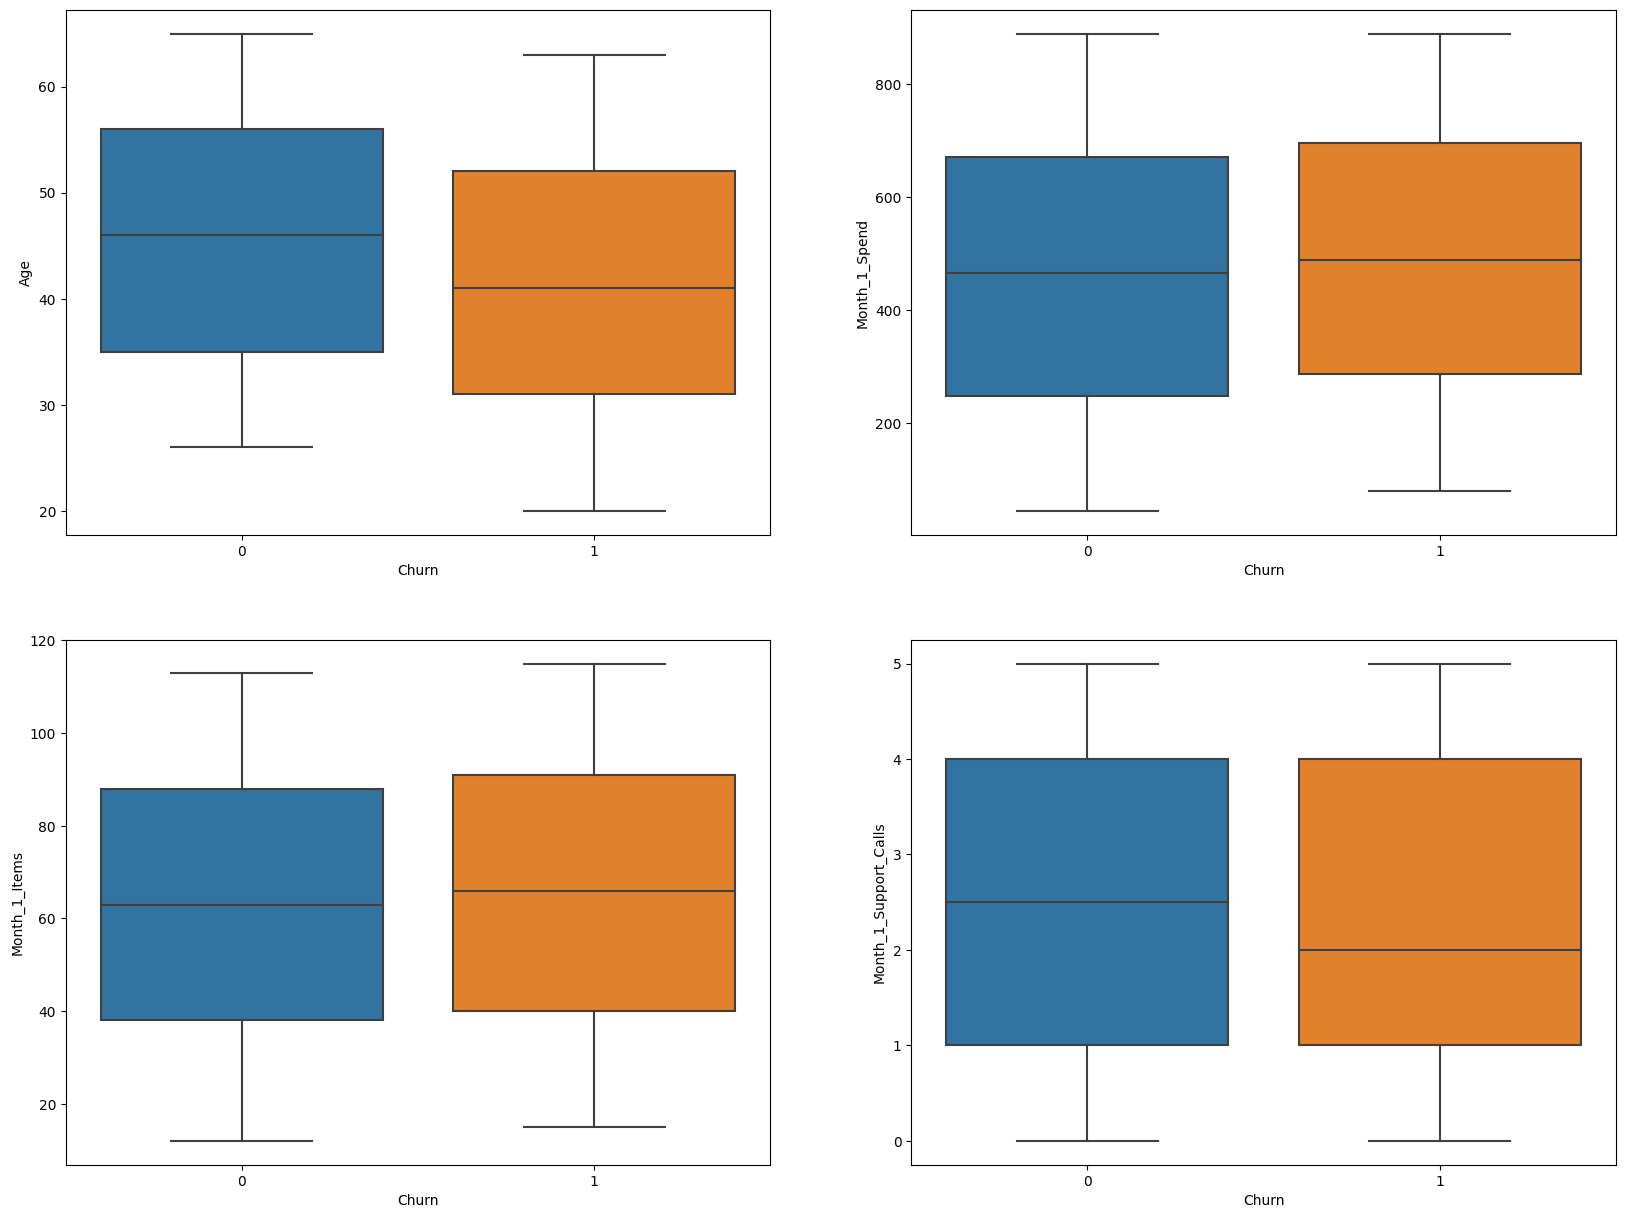

In [19]:
fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(ax=ax1, x='Churn', y='Age', data=df)
sns.boxplot(ax=ax2, x='Churn', y='Month_1_Spend', data=df)
sns.boxplot(ax=ax3, x='Churn', y='Month_1_Items', data=df)
sns.boxplot(ax=ax4, x='Churn', y='Month_1_Support_Calls', data=df)

Based on the boxplots, I can say the Age, number of items purchased during a month, and money spent in months are predicator variables. Let's check the rest of the variables, such as Device and Location, to see if they are predictors for churning.

In [46]:
df.groupby(['Device', 'Churn', 'Location'])['Location'].count().unstack()

Location       Australia  Canada  Great Britain      US
Device  Churn                                          
Android 0          216.0   233.0          233.0   214.0
        1            NaN  2460.0            NaN  2380.0
iOS     0          509.0   530.0          529.0   536.0
        1            NaN  1035.0            NaN  1125.0

It seems like we may have some missing values or issus with churing in location columns, specially with data from Austrlia and Britain. 

<Axes: xlabel='Device', ylabel='Churn'>

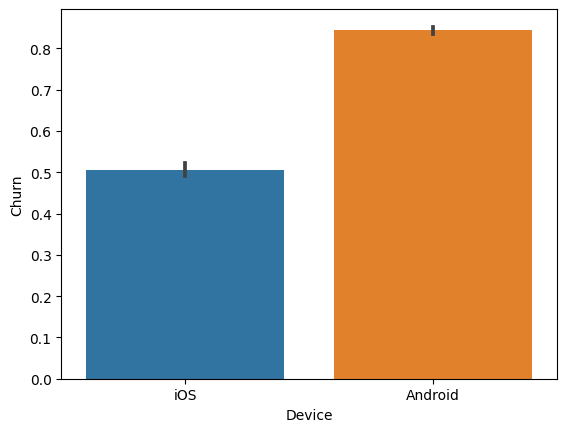

In [54]:

sns.barplot(y='Churn', x='Device', data=df)


The graph shows that Device can be an impoprtant predicator for churning.

<Axes: xlabel='Location', ylabel='Churn'>

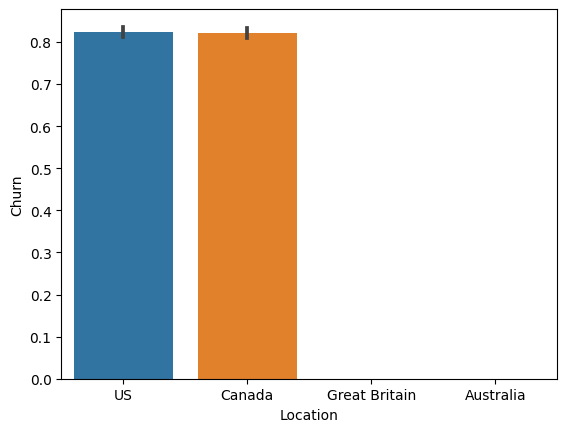

In [56]:
sns.barplot(y='Churn', x='Location', data=df)

Location doesn't seem to be a predictor for churing. 

Note: columns to be note used for modeling: Location, months support call

In [90]:
print('Great Britain: ', df[df['Location']=='Great Britain'].shape)
print('Australia: ', df[df['Location']=='Australia'].shape)
print('US: ', df[df['Location']=='US'].shape)
print('Canada: ', df[df['Location']=='Canada'].shape)

Great Britain:  (762, 42)
Australia:  (725, 42)
US:  (4255, 42)
Canada:  (4258, 42)


In [62]:
#Let's categorize customers based on their age
df['age_cat']=df['Age'].apply(lambda x: 'teen' if 0< x < 25 else 'adult' if 26<x<40 else 'old' if  41 < x <60 else 'elder')
df.head()

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,Month_4_Spend,Month_4_Items,Month_4_Support_Calls,Month_5_Spend,Month_5_Items,Month_5_Support_Calls,Month_6_Spend,Month_6_Items,Month_6_Support_Calls,Month_7_Spend,Month_7_Items,Month_7_Support_Calls,Month_8_Spend,Month_8_Items,Month_8_Support_Calls,Month_9_Spend,Month_9_Items,Month_9_Support_Calls,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,age_cat
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,212.323540,96,4,161.351349,93,3,845.591428,77,3,664.209269,61,0,819.002361,29,0,602.361687,56,1,821.634080,30,5,280.397827,60,0,700.181510,66,3,382.719682,59,0,1,old
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,186.909752,63,4,773.303829,34,0,297.160079,39,0,528.034104,99,1,456.572210,51,5,140.452893,80,5,119.900545,40,1,863.000645,89,1,571.331352,28,3,570.203975,89,0,1,old
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,316.492407,40,5,356.415894,99,1,675.126273,81,0,526.519139,90,4,289.880026,68,2,742.794005,43,4,339.855588,46,2,858.545990,60,5,198.222684,38,1,187.475764,79,5,1,old
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,162.945529,65,2,309.053455,99,0,823.619025,80,5,348.223830,65,0,512.166973,39,0,506.548323,72,5,569.576871,94,0,404.590146,59,3,565.395592,78,1,281.415092,63,4,1,elder
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,736.904463,69,1,318.644264,65,1,365.203121,44,0,742.525914,70,3,268.635619,34,3,227.938452,75,0,199.742734,67,0,178.143438,85,1,574.382094,34,2,544.981985,28,2,1,elder


<Axes: xlabel='age_cat', ylabel='Month_8_Items'>

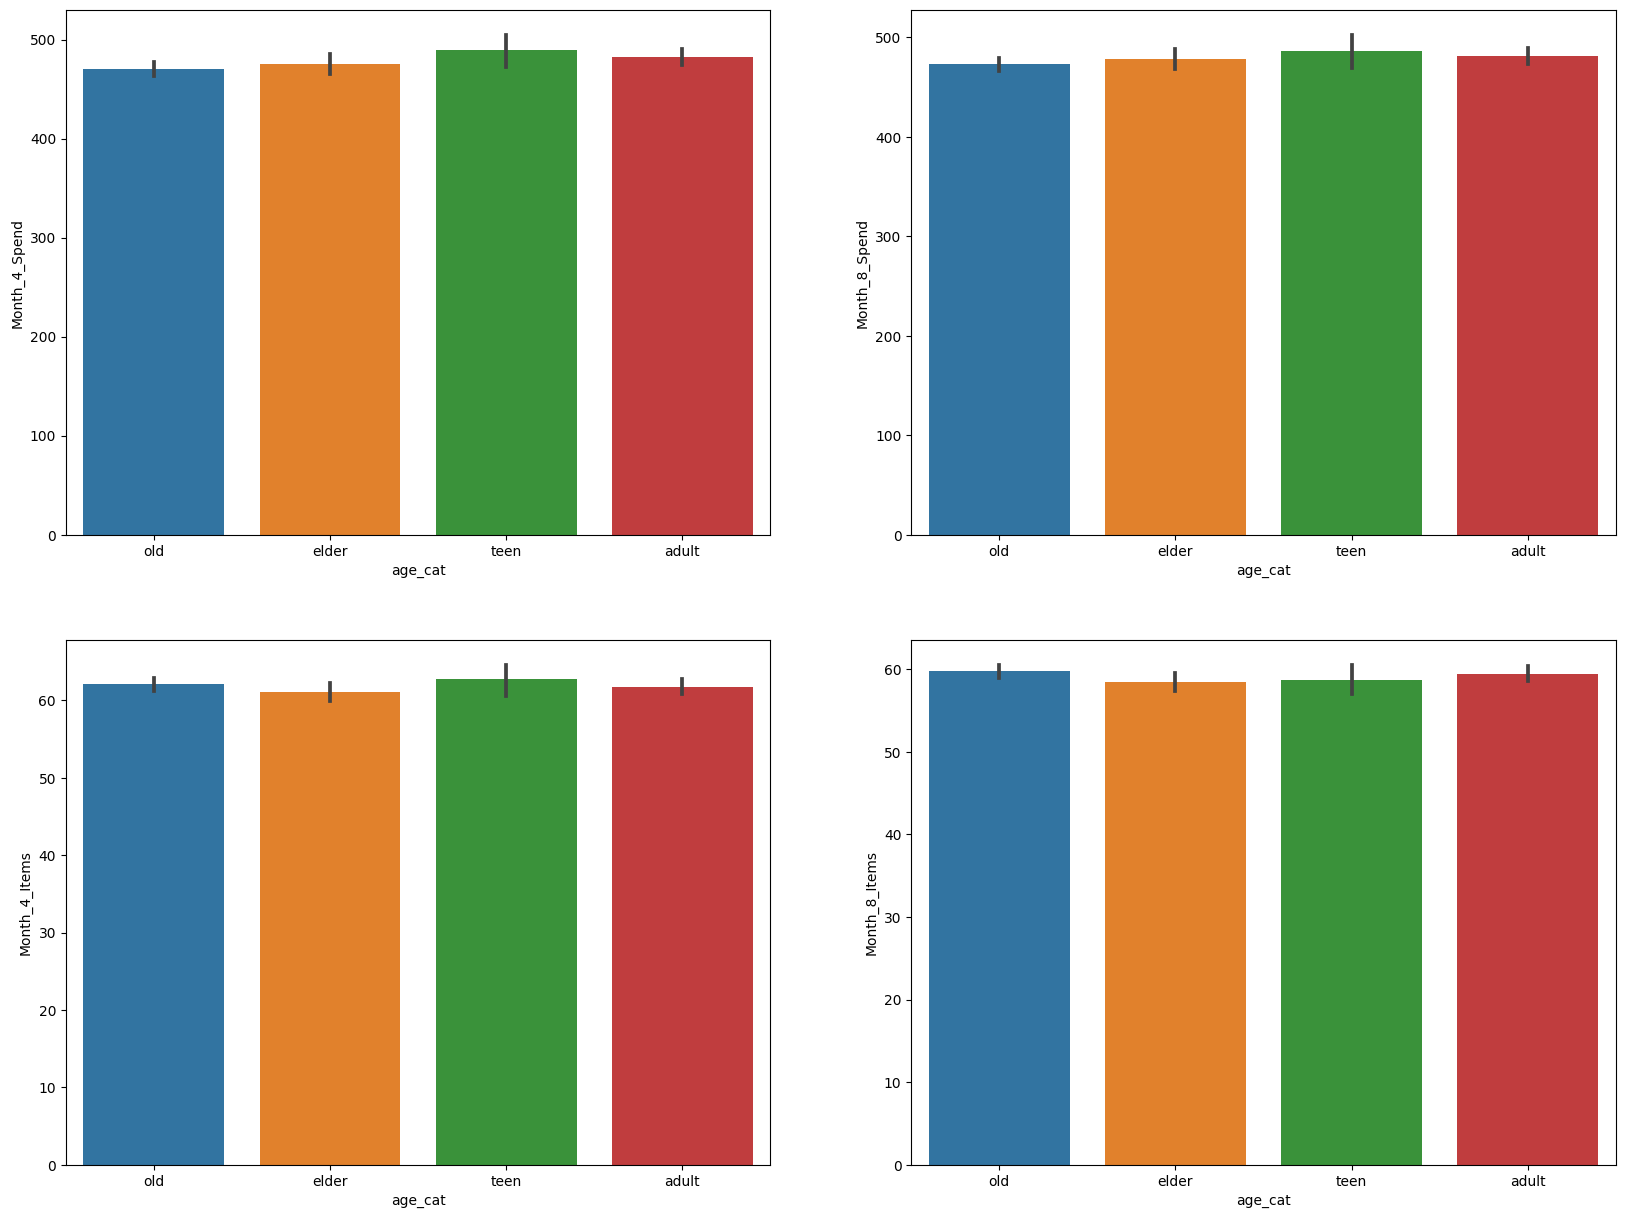

In [69]:
fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, figsize=(20, 15))
sns.barplot(x='age_cat', y='Month_4_Spend', data=df, ax=ax1)
sns.barplot(x='age_cat', y='Month_8_Spend', data=df, ax=ax2)
sns.barplot(x='age_cat', y='Month_4_Items', data=df, ax=ax3)
sns.barplot(x='age_cat', y='Month_8_Items', data=df, ax=ax4)


These barcharts shows that customer who are below 25 years olde spend more than the rest but in terms of items they purchase, customer who are between 26 to 40 are getting more items in a month. 

# Hypothesis

The hypothesis is that except Location and Month_Support_Calls features, the rest of the features are the predicator variables for the churning.

# Baseline modeling

In [81]:
X=df.drop(['CustomerID', 'Churn'], axis=1)
y=df['Churn']

In [86]:
# Creating dummy variable for categorical features
X=pd.get_dummies(X, drop_first=True)

In [87]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)


In [88]:
log=LogisticRegression()
log.fit(X_train, y_train)
pred=log.predict(X_test)
print('accuracy: ', accuracy_score(pred, y_test))
print('F1_Score: ', f1_score(pred, y_test))
print('precision: ', precision_score(pred, y_test))
print('recal score: ',recall_score(pred, y_test))


accuracy:  0.7485
F1_Score:  0.8376895772829945
precision:  0.9205673758865248
recal score:  0.76850207223209


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Based on accuracy and f1 scores, the model seems promising.

In [89]:
# lets check out its features importance, too, to see if we can improve the model performance
pd.DataFrame([log.feature_names_in_, log.coef_.flatten()]).T

,0,1
0,Age,-0.023756
1,Month_1_Spend,0.000648
2,Month_1_Items,0.003699
3,Month_1_Support_Calls,0.004383
4,Month_2_Spend,0.000313
5,Month_2_Items,0.004024
6,Month_2_Support_Calls,0.137656
7,Month_3_Spend,0.000314
8,Month_3_Items,0.000411
9,Month_3_Support_Calls,0.072249


The baseline model has proven the hypothesis wrong because the table shows that month support calls and location are important features for churning, while month spetn and month items are not. So, month spend features will be removed for next modeling.

# Model comparison

In [92]:
#feature selection
X=df.drop(['CustomerID', 'age_cat', 'Churn', 'Month_1_Spend', 'Month_2_Spend', 'Month_3_Spend', 'Month_4_Spend', 'Month_5_Spend', 'Month_6_Spend', 'Month_7_Spend', 'Month_8_Spend', 'Month_9_Spend', 'Month_10_Spend', 'Month_11_Spend', 'Month_12_Spend'], axis=1)
y=df['Churn']

In [94]:
#creating dummies for categorical variables in X
X=pd.get_dummies(X, drop_first=True, dtype=int)

In [95]:
#spliting into train and test 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

In [98]:
#selecting different models to train my data
log=LogisticRegression()
knn=KNeighborsClassifier()
nb=GaussianNB()
svc=SVC()
dt=DecisionTreeClassifier()


In [99]:
#training my data with different models
log.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
svc.fit(X_train, y_train)
dt.fit(X_train, y_train)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [103]:
#predicting with different models
pred_log=log.predict(X_test)
pred_knn=knn.predict(X_test)
pred_nb=nb.predict(X_test)
pred_svc=svc.predict(X_test)
pred_dt=dt.predict(X_test)


In [106]:
#checking their accuracy and preformance
print('logistics: ', f1_score(pred_log, y_test))
print('KNN: ', f1_score(pred_knn, y_test))
print('NB: ', f1_score(pred_nb, y_test))
print('SVC: ', f1_score(pred_svc, y_test))
print('dt f1: ', f1_score(pred_dt, y_test))
print('dt accuracy score: ', accuracy_score(pred_dt, y_test))

logistics:  0.9040639573617588
KNN:  0.8307219662058372
NB:  0.8676923076923077
SVC:  0.8724572166612851
dt f1:  0.9549485633203264
dt accuracy score:  0.9365


Based on the f1 scores of different models, Decision tree and Logistic Regression preform better for this data.

# Decision Tree Hypter tunning 

In [108]:
#The goals hyper tunning is to optimize the model performance. However to optimze the model performance properly, i need to find out which parameters suits well in order to increase the  model performance. 
#that is why i perform GrissearchCV with cross validation to find the best parameters here.
dt_tunned=DecisionTreeClassifier(random_state=123)

params={'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

grid=GridSearchCV(estimator=dt_tunned, param_grid=params, cv=10, n_jobs=1, verbose=2)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples

(0.920625, {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2})

 it shows that max_depth of 9 with min_sample_leaf of 1 and min_samples_split of 2 will improve the Decision Tree performance for this dataset.

In [110]:
dt_tunned=DecisionTreeClassifier(random_state=123, max_depth=9, min_samples_leaf=1, min_samples_split=2)
dt_tunned.fit(X_train, y_train)
pred_dt_tunned=dt_tunned.predict(X_test)
print('dt f1: ', f1_score(pred_dt_tunned, y_test))
print('dt accuracy score: ', accuracy_score(pred_dt_tunned, y_test))

dt f1:  0.9482178883658372
dt accuracy score:  0.923


The f1 score and accuracy of decision tree are decreased a little bit after hypter tunning. The difference is very small comparing to before hypter tunning.

# logistic Regression Hyper tunning

In [115]:

log_tunned=LogisticRegression()
#defining the parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
#defining the grid search
grid = dict(solver=solvers,penalty=penalty)
grid_search = GridSearchCV(estimator=log_tunned, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.best_score_, grid_result.best_params_





/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(0.861125, {'penalty': 'l2', 'solver': 'newton-cg'})

In [116]:
log_tunned=LogisticRegression(penalty='l2', solver='newton-cg')
log_tunned.fit(X_train, y_train)
pred_log_tunned=log_tunned.predict(X_test)
print('f1 score: ', f1_score(pred_log_tunned, y_test))


f1 score:  0.9081869406695392


Hypyer tunning has imporved the logistic regression model performance but it is not significant, and its performance is still lower than the Decision Tree Classifier model.

#  Final Model Selection recommendation for training  this dataset

The model that performs better than the rest of the models is the Decision tree Classifier. This decsion is reached after comparing the f1 score of different models. F1 score is a machine learning evaluation metric that measures a model's accuracy. So, the recommendation is that business should use this model when it predicting whether customers churn or not based on different predictor variables. 

# Q6: 

finding shows that customers are age betwen 20 to 64 years old. additionally, it also shows that those customers who spend more are churning comparing to those who spend less. it is the same with items. i have also found that most of the customer are using iOS device, and around 80 % of customers are living in Canada and UK.

# Hypothesis

The hypothesis was that except Location and Month_Support_Calls features, the rest of the features are the predicator variables for the churning. However, the baseline model has proven the hypothesis wrong because the table shows that month support calls and location are important features for churning, while month spetn and month items are not. 